In [1]:
import gymnasium as gym
from stable_baselines3 import PPO


In [ ]:
env = gym.make("HalfCheetah-v5", render_mode="human")  # Set render_mode to None for training
obs, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # Take random actions
    obs, reward, done, truncated, info = env.step(action)

env.close()

In [ ]:
env = gym.make("HalfCheetah-v4")
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1_000_000)
model.save("ppo_halfcheetah")


c:\Users\Rishub\anaconda3\envs\rlenv\lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -335     |
| time/              |          |
|    fps             | 2804     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -385        |
| time/                   |             |
|    fps                  | 1972        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009834007 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [7]:
model = PPO.load("ppo_halfcheetah_800000_steps.zip")

print(model.policy)

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=17, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=17, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=6, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)


-0.5011632276073515
-1.076518361489109
-1.1253679486931873
0.40610646372790493
0.9056594958994613
0.15105133415048866
-0.27114451131874523
-0.3226729005297931
1.5174237346089894
2.4756955332631683
1.4270762702000368
-0.256697243826703
0.04093714677739091
2.1504961965095712
3.089465363994884
2.2447178259949814
0.9429477454439223
-0.3577615507044527
0.6268784881539813
1.4607964078673596
0.8848713472186853
-0.12083369234683783
0.2244010808966186
1.8017928499009974
1.9964138762863257
0.8958069248181708
-0.05848898645134071
-0.38703980005443483
0.7412336009062823
0.9536172261968137
-0.39973570724088603
-0.4158196905506415
1.6999685973669951
2.5116610351672373
1.9022301876672865
1.298144362247088
0.30276541955520475
0.9262862133832677
2.8617725782109673
2.47603312158623
1.1490106692642943
0.8420852659495317
1.8544056681701395
3.0625077897420976
3.0647345602715337
1.9765140639075653
0.41923230214933405
2.016967643506611
3.7873543096772373
3.391550492600228
2.2040750680298036
1.270623611708419

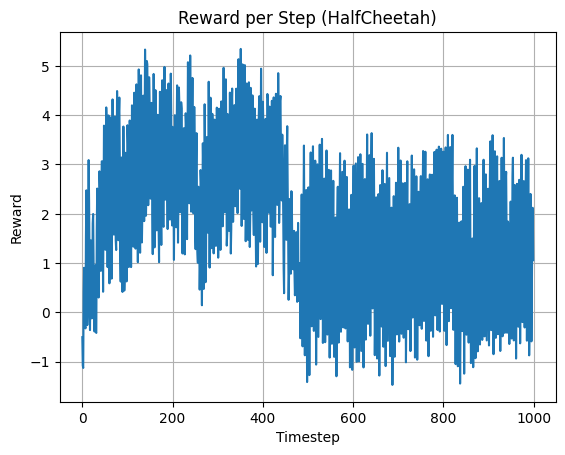

In [11]:
import matplotlib.pyplot as plt
import time

env = gym.make("HalfCheetah-v5", render_mode="human")
obs, _ = env.reset()

# Store rewards for plotting
rewards = []

# Run the model
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    print(reward)
    rewards.append(reward)

    if done or truncated:
        obs, _ = env.reset()
    
    time.sleep(0.05)  
   

env.close()

# Plot the rewards
plt.plot(rewards)
plt.title("Reward per Step (HalfCheetah)")
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.grid(True)
plt.show()
